# Programming Assignment - 5
---
## Name: Aaron vo
---

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from scipy.sparse.linalg import svds
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

## Question 1
---
Use your understanding of singular value decomposition and recommendation systems (from your last reading) to build a basic movie recommendation system. 

>- Evaluate your system on the test data (20%) and present the statistics (precision, recall and F1-score).  

Use the following data set https://grouplens.org/datasets/movielens/100k/. 

In [186]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('MLData/u.data', sep='|', encoding='latin-1', names=u_cols)

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('MLData/u.data', sep='\t',encoding='latin-1',  names=r_cols)

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('MLData/u.item', sep='|', encoding='latin-1', names=m_cols, usecols=range(5),
                     dtype={'release_date': "S100", 'imdb_url': "S200"})

training_data, test_data = train_test_split(ratings,test_size=0.2)

In [187]:
training_ratings = training_data.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
test_ratings = test_data.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
training_ratings.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1668,1669,1671,1672,1673,1676,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,0.0,0.0,0.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
user_training_ratings_mean = np.mean(training_ratings.values, axis = 1)
training_ratings_demeaned = training_ratings.values - user_ratings_mean.reshape(-1, 1)

U, Sigma, Vt = svds(training_ratings_demeaned, k = 50)
Sigma = np.diag(Sigma)

user_predicted_training_ratings = np.dot(np.dot(U, Sigma), Vt)

preds = pd.DataFrame(user_predicted_training_ratings, columns = training_ratings.columns)
preds.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1668,1669,1671,1672,1673,1676,1679,1680,1681,1682
0,3.672526,1.210037,1.360753,1.738853,-0.391018,0.136111,-0.138505,2.143406,2.461502,1.344690,...,-0.468559,-0.477099,-0.494425,-0.456568,-0.549461,-0.471498,-0.479290,-0.484253,-0.523967,-0.427354
1,1.492534,-0.374235,0.197944,-0.097108,-0.140296,-0.046908,1.352031,0.189566,0.627699,0.572180,...,-0.097118,-0.100812,-0.108037,-0.101090,-0.091211,-0.102748,-0.101168,-0.103513,-0.101538,-0.117750
2,-0.143943,-0.015053,0.032448,-0.228080,-0.211927,-0.070444,0.027458,0.166305,-0.228649,0.001519,...,-0.041891,-0.050882,-0.064495,-0.064310,-0.085759,-0.050153,-0.036781,-0.047475,-0.067704,-0.078503
3,0.080002,-0.202819,0.058112,0.017414,0.007825,-0.166140,0.620807,-0.391908,-0.136900,-0.167530,...,-0.027079,-0.030477,-0.036479,-0.034656,-0.029622,-0.049034,-0.018715,-0.024900,-0.069312,-0.051698
4,2.660958,1.459278,0.387316,0.825130,-0.283536,-0.209571,1.273861,0.110598,0.333141,0.525706,...,-0.246378,-0.243898,-0.238405,-0.247152,-0.203462,-0.226189,-0.244028,-0.242331,-0.260325,-0.244354


In [191]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.user_id == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movie_id', right_on = 'movie_id').
                     sort_values(['rating'], ascending=False))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movie_id'].isin(user_full['movie_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movie_id',
               right_on = 'movie_id').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return recommendations

In [192]:
 predictions = recommend_movies(preds, 23, movies, ratings, 20)

In [193]:
predictions

,movie_id,title,release_date,video_release_date,imdb_url
121,168,Monty Python and the Holy Grail (1974),b'01-Jan-1974',NaN,b'http://us.imdb.com/M/title-exact?Monty%20Pyt...
379,496,It's a Wonderful Life (1946),b'01-Jan-1946',NaN,"b""http://us.imdb.com/M/title-exact?It's%20a%20..."
226,318,Schindler's List (1993),b'01-Jan-1993',NaN,"b""http://us.imdb.com/M/title-exact?Schindler's..."
100,137,Big Night (1996),b'20-Sep-1996',NaN,b'http://us.imdb.com/M/title-exact?Big%20Night...
141,208,Young Frankenstein (1974),b'01-Jan-1974',NaN,b'http://us.imdb.com/M/title-exact?Young%20Fra...
66,86,"Remains of the Day, The (1993)",b'01-Jan-1993',NaN,b'http://us.imdb.com/M/title-exact?Remains%20o...
363,478,"Philadelphia Story, The (1940)",b'01-Jan-1940',NaN,b'http://us.imdb.com/M/title-exact?Philadelphi...
89,121,Independence Day (ID4) (1996),b'03-Jul-1996',NaN,b'http://us.imdb.com/M/title-exact?Independenc...
142,210,Indiana Jones and the Last Crusade (1989),b'01-Jan-1989',NaN,b'http://us.imdb.com/M/title-exact?Indiana%20J...
322,431,Highlander (1986),b'01-Jan-1986',NaN,b'http://us.imdb.com/M/title-exact?Highlander%...


In [194]:
def evaluate_model(predictions, test_ratings, threshold=3.5):
    true_labels = np.where(test_ratings > threshold, 1, 0)
    predicted_labels = np.where(predictions > threshold, 1, 0)
    precision = precision_score(true_labels.ravel(), predicted_labels.ravel())
    recall = recall_score(true_labels.ravel(), predicted_labels.ravel())
    f1 = f1_score(true_labels.ravel(), predicted_labels.ravel())
    return precision, recall, f1

In [195]:
test_ratings_mean = np.mean(test_ratings.values, axis = 1)
test_ratings_demeaned = test_ratings.values - test_ratings_mean.reshape(-1, 1)

U, Sigma, Vt = svds(test_ratings_demeaned, k = 50)
Sigma = np.diag(Sigma)

test_predicted_ratings = np.dot(np.dot(U, Sigma), Vt)

test_preds = pd.DataFrame(test_predicted_ratings, columns = test_ratings.columns)
test_preds.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1654,1656,1658,1666,1670,1672,1674,1675,1677,1678
0,-0.223577,0.254557,-0.062130,-0.020042,1.098930,1.345140,3.982179,0.254118,0.274121,0.433379,...,-0.161193,-0.036428,-0.175757,-0.175757,-0.181288,-0.171907,-0.299608,-0.189521,-0.205821,-0.173898
1,0.216608,0.079597,-0.015901,0.053257,0.052990,0.019575,0.107386,0.158532,0.237813,-0.234674,...,-0.045996,0.076152,-0.035173,-0.035173,-0.029485,-0.037407,-0.024061,-0.050176,-0.041791,-0.046245
2,-0.149409,-0.005641,0.030258,-0.273955,-0.109920,-0.081241,-0.004680,0.009254,0.002999,-0.027362,...,-0.007521,-0.020443,-0.005331,-0.005331,-0.003189,-0.017326,-0.000764,-0.010508,-0.003245,-0.002736
3,-0.129303,0.132016,0.009614,0.289640,0.095308,0.001076,0.034884,0.031237,0.307694,0.060179,...,-0.007957,-0.008166,0.008221,0.008221,0.016438,-0.004118,0.001788,-0.000726,-0.010130,-0.006304
4,0.036298,-0.029579,0.164186,1.029826,0.054595,-0.060510,-0.279978,0.777043,-0.030015,-0.031547,...,-0.053385,-0.039118,-0.054878,-0.054878,-0.055904,-0.069370,-0.006701,-0.082817,-0.040197,-0.054791


In [198]:
train_precision, train_recall, train_f1 = evaluate_model(user_predicted_training_ratings, training_ratings.values)
test_precision, test_recall, test_f1 = evaluate_model(test_predicted_ratings, test_ratings.values)

print('Training Set:')
print('Precision: {:.2f}'.format(train_precision))
print('Recall: {:.2f}'.format(train_recall))
print('F1-score: {:.2f}'.format(train_f1))

print('\nTesting Set:')
print('Precision: {:.2f}'.format(test_precision))

Training Set:
Precision: 0.94
Recall: 0.14
F1-score: 0.25

Testing Set:
Precision: 0.98


## Question 2
---
Use the Python code for image compression to compress the national flags of different countries. The smalles rank $r$ gives the numerical rank of the flag. Pick up any 5 national flags and arrange them in the order of decreasing numerical rank.

In [112]:
def compress_image(M, k):
    u, s, vh = np.linalg.svd(M, full_matrices=True)
    U_k = u[: , :k]
    s_k = s[:k]
    S_k = np.diag(s_k)
    Vh_k = vh[:k]
    rank_k_approximation = np.dot(U_k, np.dot(S_k, Vh_k))
    return rank_k_approximation

[[0.45433843 0.45433843 0.45433843 ... 0.45433843 0.45433843 0.45433843]
 [0.45433843 0.45433843 0.45433843 ... 0.45433843 0.45433843 0.45433843]
 [0.45433843 0.45433843 0.45433843 ... 0.45433843 0.45433843 0.45433843]
 ...
 [0.45433843 0.45433843 0.45433843 ... 0.45433843 0.45433843 0.45433843]
 [0.45433843 0.45433843 0.45433843 ... 0.45433843 0.45433843 0.45433843]
 [0.45433843 0.45433843 0.45433843 ... 0.45433843 0.45433843 0.45433843]]


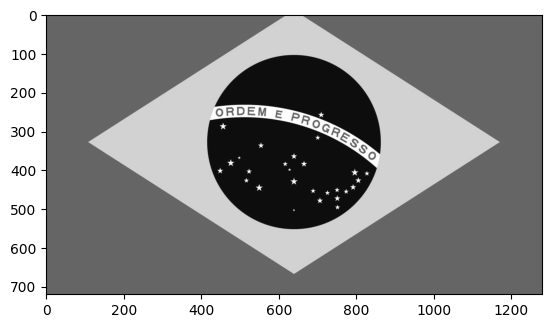

In [113]:
greyImg = io.imread('brazil.jpeg', as_gray=True)
print(greyImg)
imgPlot = plt.imshow(greyImg, cmap='gray')
plt.show()

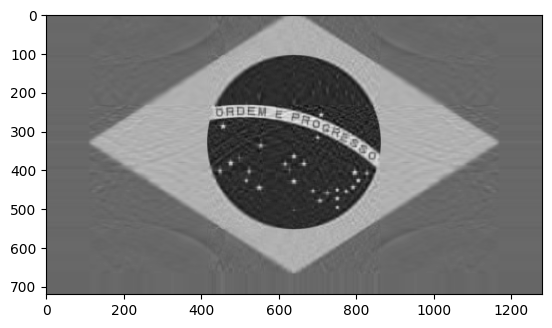

In [114]:
r = compress_image(greyImg, 30)
image = plt.imshow(r, cmap ='gray')
plt.show()

[[0.94536588 0.74144431 0.85909137 ... 0.85824314 0.77617294 0.91734941]
 [0.99943451 0.83556196 0.98850314 ... 0.98373333 0.86244745 0.9565651 ]
 [0.94144431 0.79634627 0.98850314 ... 0.99858627 0.86636902 0.94480039]
 ...
 [0.96722078 0.82547882 0.99719451 ... 0.97196863 0.83499647 0.92519255]
 [0.9280051  0.76722078 0.9156749  ... 0.93275294 0.8310749  0.93303569]
 [0.99719451 0.83388745 0.95881216 ... 0.93275294 0.85852588 0.98009451]]


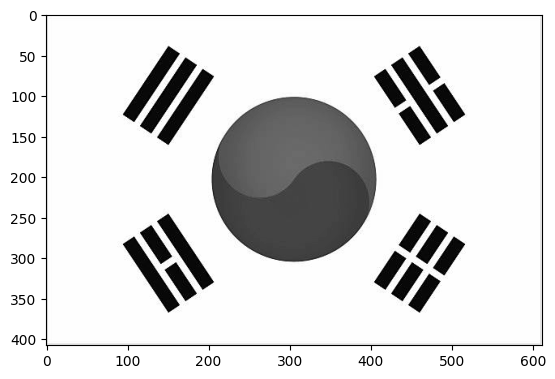

In [115]:
greyImg = io.imread('korea.jpg', as_gray=True)
print(greyImg)
imgPlot = plt.imshow(greyImg, cmap='gray')
plt.show()

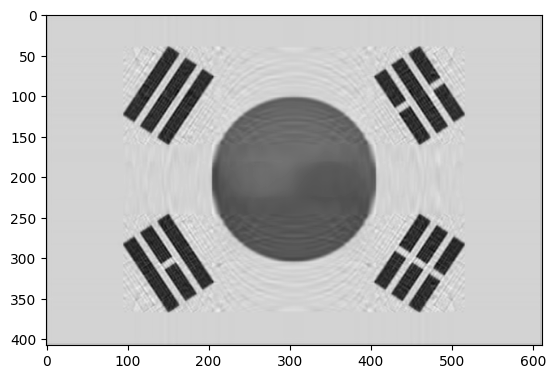

In [116]:
r = compress_image(greyImg, 25)
image = plt.imshow(r, cmap ='gray')
plt.show()

[[0.30454902 0.30454902 0.30454902 ... 0.30454902 0.30454902 0.30454902]
 [0.30454902 0.30454902 0.30454902 ... 0.30454902 0.30454902 0.30454902]
 [0.30454902 0.30454902 0.30454902 ... 0.30454902 0.30454902 0.30454902]
 ...
 [0.30454902 0.30454902 0.30454902 ... 0.30454902 0.30454902 0.30454902]
 [0.30454902 0.30454902 0.30454902 ... 0.30454902 0.30454902 0.30454902]
 [0.30454902 0.30454902 0.30454902 ... 0.30454902 0.30454902 0.30454902]]


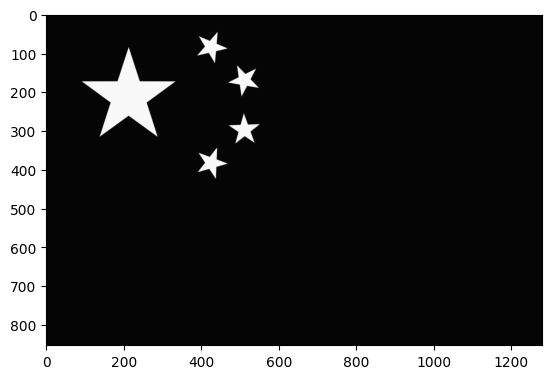

In [117]:
greyImg = io.imread('china.png', as_gray=True)
print(greyImg)
imgPlot = plt.imshow(greyImg, cmap='gray')
plt.show()

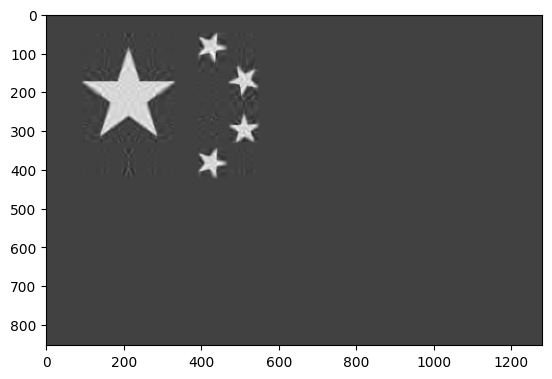

In [118]:
r = compress_image(greyImg, 20)
image = plt.imshow(r, cmap ='gray')
plt.show()

[[0.24662588 0.24662588 0.24662588 ... 0.25842275 0.25842275 0.25842275]
 [0.24662588 0.24662588 0.24662588 ... 0.25842275 0.25842275 0.25842275]
 [0.24662588 0.24662588 0.24662588 ... 0.25842275 0.25842275 0.25842275]
 ...
 [0.25842275 0.25842275 0.25842275 ... 0.25842275 0.25842275 0.25842275]
 [0.25842275 0.25842275 0.25842275 ... 0.25842275 0.25842275 0.25842275]
 [0.25842275 0.25842275 0.25842275 ... 0.25842275 0.25842275 0.25842275]]


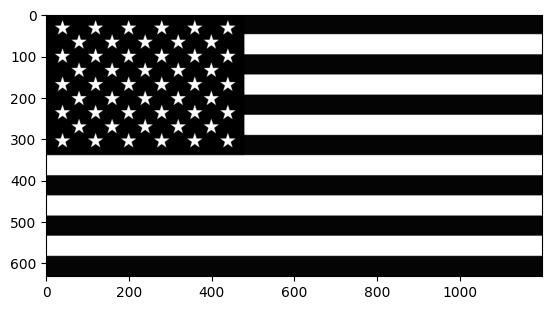

In [119]:
greyImg = io.imread('usa.png', as_gray=True)
print(greyImg)
imgPlot = plt.imshow(greyImg, cmap='gray')
plt.show()

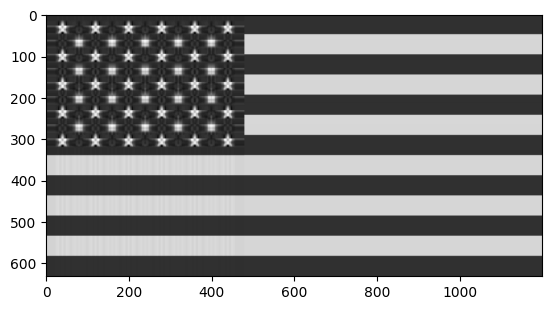

In [120]:
r = compress_image(greyImg, 5)
image = plt.imshow(r, cmap ='gray')
plt.show()

[[0.20237059 0.20237059 0.20237059 ... 0.20237059 0.20237059 0.20237059]
 [0.20237059 0.20237059 0.20237059 ... 0.20237059 0.20237059 0.20237059]
 [0.20237059 0.20237059 0.20237059 ... 0.20237059 0.20237059 0.20237059]
 ...
 [0.20237059 0.20237059 0.20237059 ... 0.20237059 0.20237059 0.20237059]
 [0.20237059 0.20237059 0.20237059 ... 0.20237059 0.20237059 0.20237059]
 [0.20237059 0.20237059 0.20237059 ... 0.20237059 0.20237059 0.20237059]]


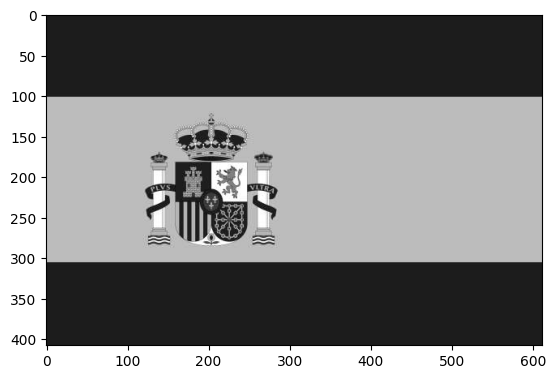

In [121]:
greyImg = io.imread('spain.jpg', as_gray=True)
print(greyImg)
imgPlot = plt.imshow(greyImg, cmap='gray')
plt.show()

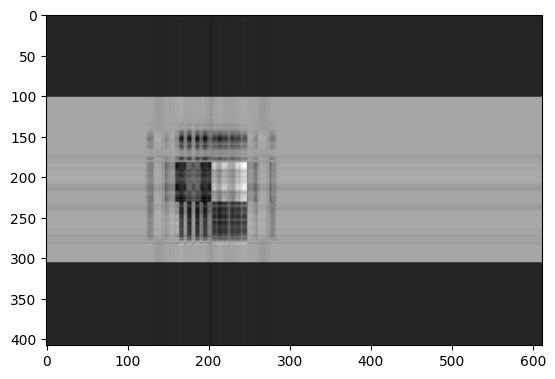

In [122]:
r = compress_image(greyImg, 3)
image = plt.imshow(r, cmap ='gray')
plt.show()